In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-salaries/ds_salaries.csv


## import libraries

In [2]:
# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go


%matplotlib inline


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
plt.style.use('default')

In [4]:
# read dataset
df = pd.read_csv('../input/data-science-job-salaries/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Data Cleaning

### Removing Unused columns

In [5]:
df = df.drop(df[['salary','salary_currency','Unnamed: 0']],axis = 1)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


### check null values

<AxesSubplot:>

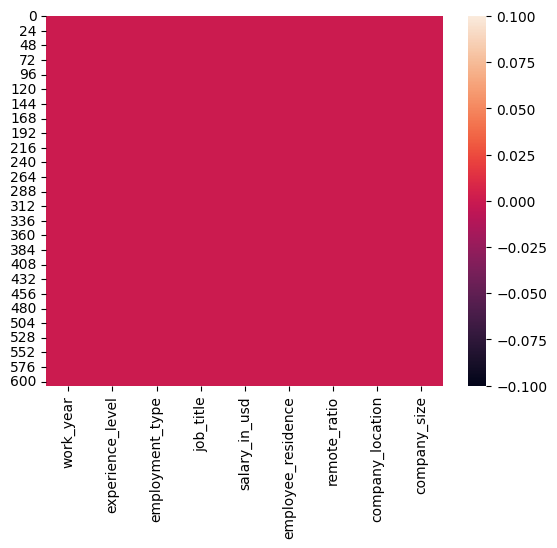

In [6]:
#check null values
sns.heatmap(df.isna())

In [7]:
# unique experience level values
df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

### rename experience level values

In [8]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level')


In [9]:
# unique experience level values
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

### rename employment_type values

In [10]:
df['employment_type'] = df['employment_type'].replace('FT','Full-time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('PT','part-time')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')

In [11]:
df.company_size.unique()

array(['L', 'S', 'M'], dtype=object)

### rename company_size values

In [12]:
df['company_size'] = df['company_size'].replace('L','Large')
df['company_size'] = df['company_size'].replace('S','Small')
df['company_size'] = df['company_size'].replace('M','medium')

In [13]:
df.remote_ratio.unique()

array([  0,  50, 100])

### rename remote_ratio values

In [14]:
df['remote_ratio'] = df['remote_ratio'].replace(0,'No remote work')
df['remote_ratio'] = df['remote_ratio'].replace(50,'Partially remote')
df['remote_ratio'] = df['remote_ratio'].replace(100,'Fully remote')

In [15]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,79833,DE,No remote work,DE,Large
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,JP,No remote work,JP,Small
2,2020,Senior-level,Full-time,Big Data Engineer,109024,GB,Partially remote,GB,medium
3,2020,Mid-level,Full-time,Product Data Analyst,20000,HN,No remote work,HN,Small
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,US,Partially remote,US,Large


# Exploratory Data Analysis

## a general look on the data

In [16]:
df.describe()

,work_year,salary_in_usd
count,607.000000,607.000000
mean,2021.405272,112297.869852
std,0.692133,70957.259411
min,2020.000000,2859.000000
25%,2021.000000,62726.000000
50%,2022.000000,101570.000000
75%,2022.000000,150000.000000
max,2022.000000,600000.000000


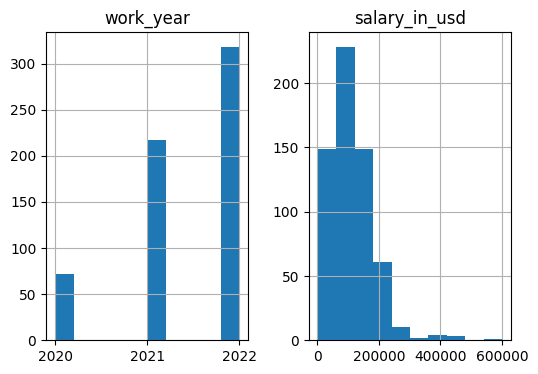

In [17]:
#diplay general look
df.hist(figsize= (6,4));

## Experience Level Distribution

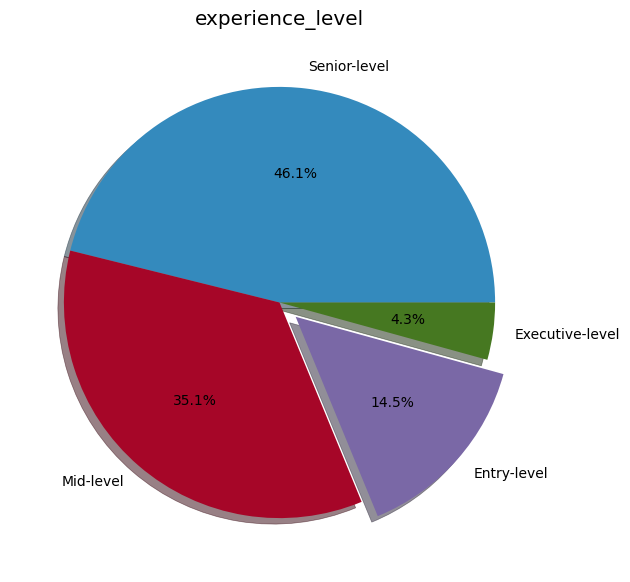

In [18]:
exp = df['experience_level'].value_counts()
my_labels = 'Senior-level','Mid-level','Entry-level','Executive-level'
my_explode = (0,0, 0.1, 0)
plt.style.use('bmh')
fig = plt.figure(figsize =(10, 7))
plt.pie(exp ,labels=my_labels,autopct='%1.1f%%', shadow = True, explode=my_explode)
plt.title('experience_level')
plt.show()

(0.0, 100.0, 0.0, 100.0)

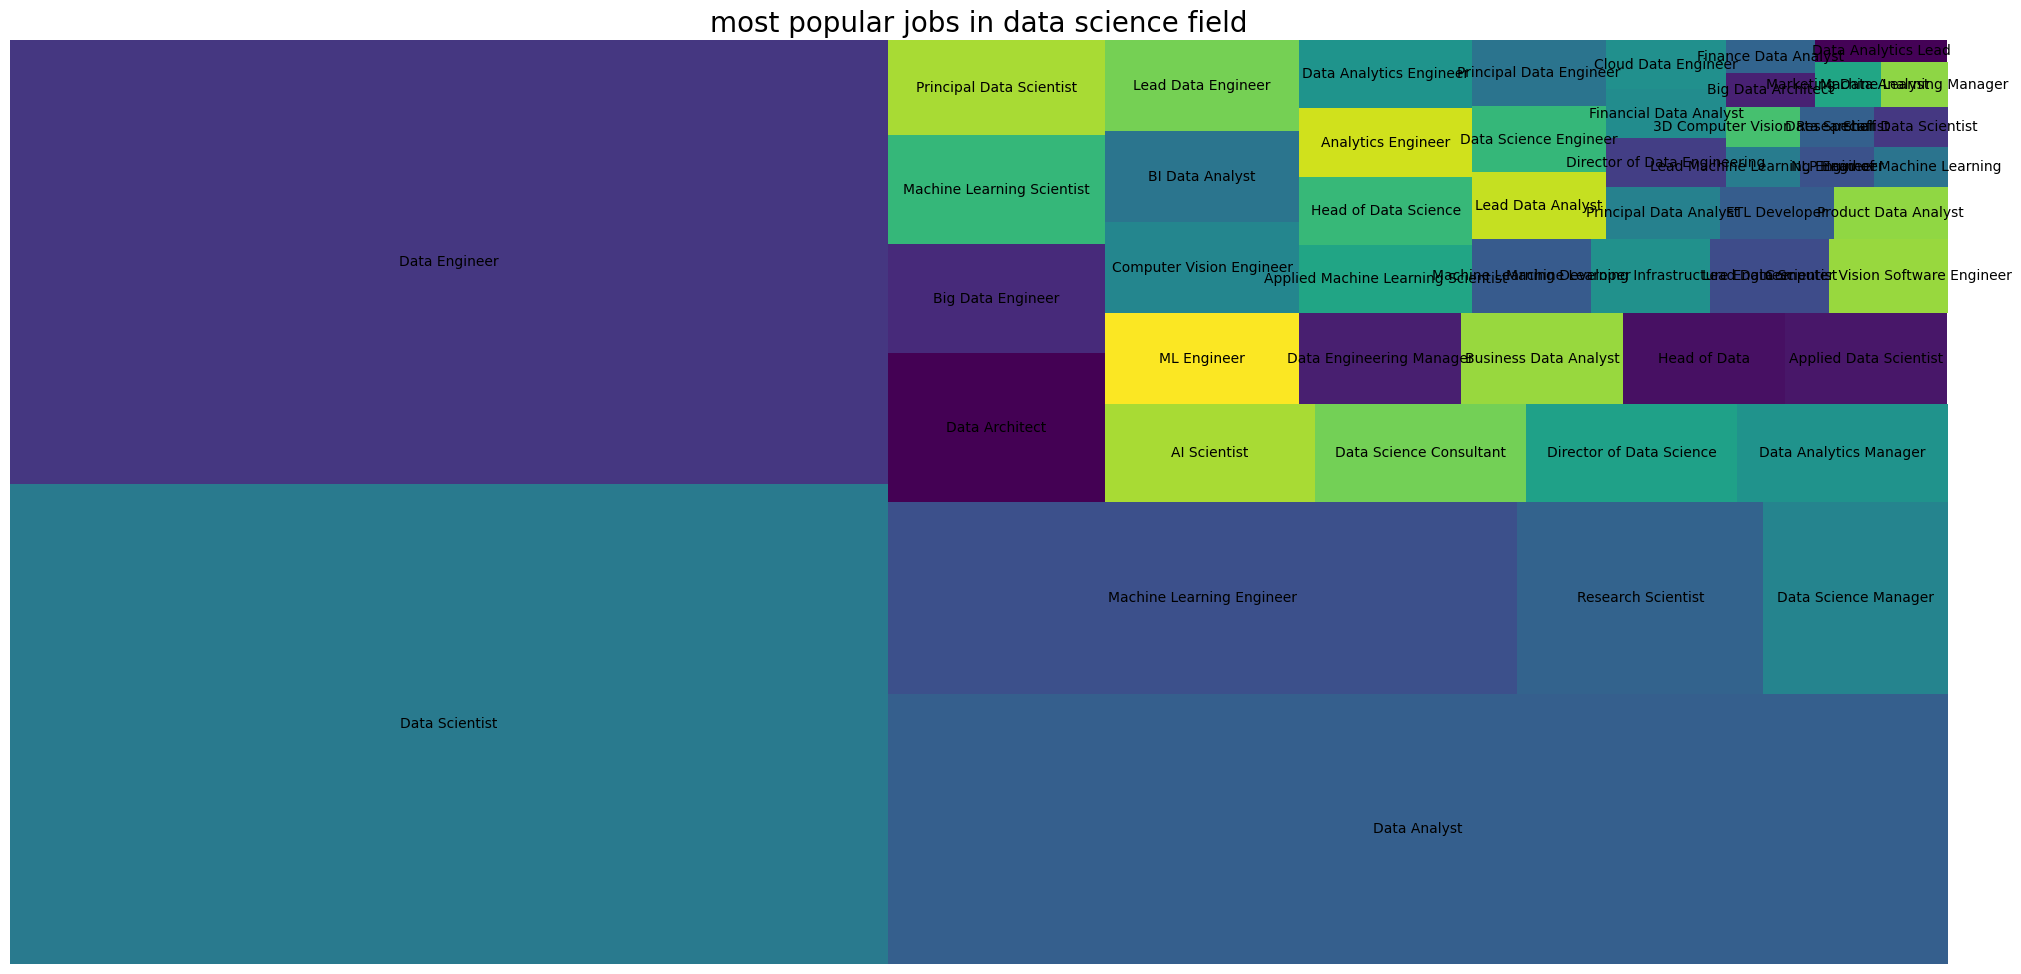

In [19]:
import squarify 
title = df['job_title'].value_counts()
fig = plt.figure(figsize =(25, 12))
names = df['job_title'].value_counts().index.get_level_values(0).tolist()
squarify.plot(sizes=title,label=names, alpha=1 )
plt.title('most popular jobs in data science field', fontsize=20)
plt.axis('off')



In [20]:
top10_job_title = df['job_title'].value_counts()[:10]
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index,
             color = top10_job_title.index,
             title= 'Top 10 Job Titles'
             )
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))

fig.show()

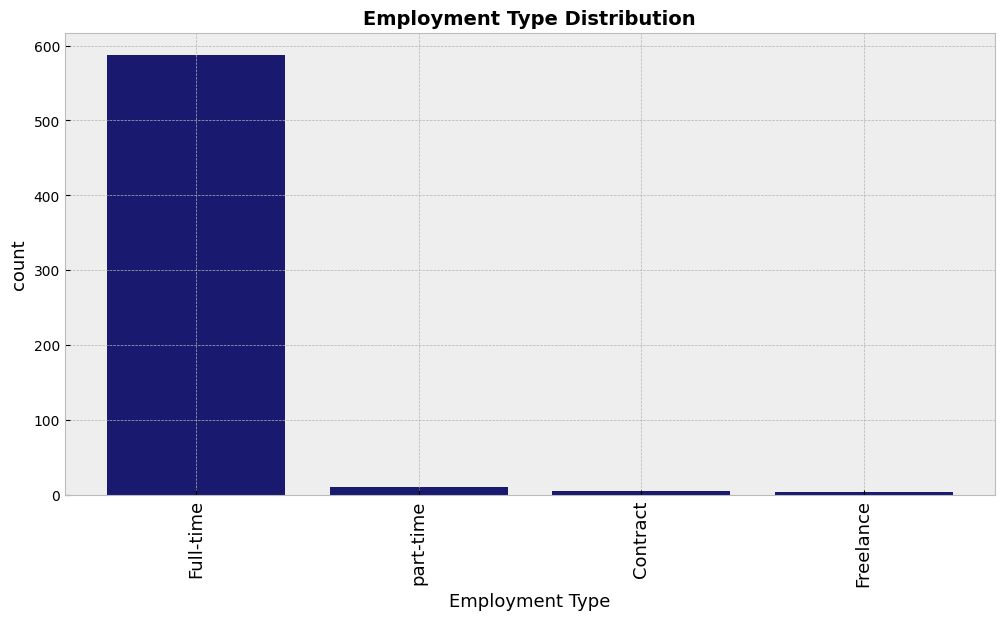

In [21]:
emp_type = df['employment_type'].value_counts()
type_quan = df['employment_type'].value_counts().index.get_level_values(0).tolist()
fig = plt.figure(figsize =(12, 6))
plt.bar(type_quan,emp_type,color = "midnightblue")
plt.xticks(rotation = 90, fontsize = 13)
plt.ylabel("count", fontsize =13 )
plt.xlabel("Employment Type", fontsize =13)
plt.title("Employment Type Distribution",fontsize =14, fontweight = "bold")
plt.show()

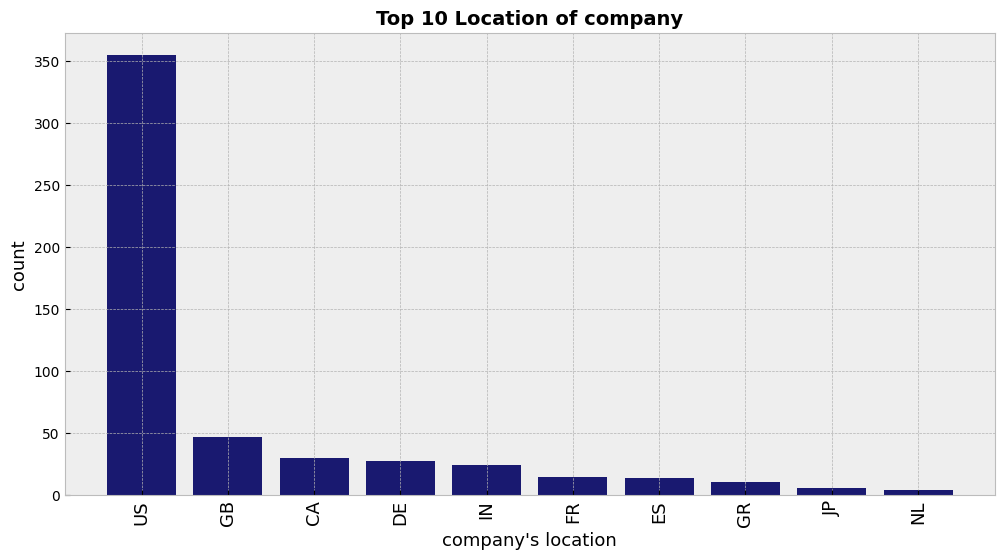

In [22]:
com_loc = df['company_location'].value_counts()[:10]
com_quan = df['company_location'].value_counts().index.get_level_values(0).tolist()[:10]
fig = plt.figure(figsize =(12, 6))
plt.bar(com_quan,com_loc,color = "midnightblue")
plt.xticks(rotation = 90, fontsize = 13)
plt.ylabel("count", fontsize =13 )
plt.xlabel("company's location", fontsize =13)
plt.title("Top 10 Location of company",fontsize =14, fontweight = "bold")
plt.show()

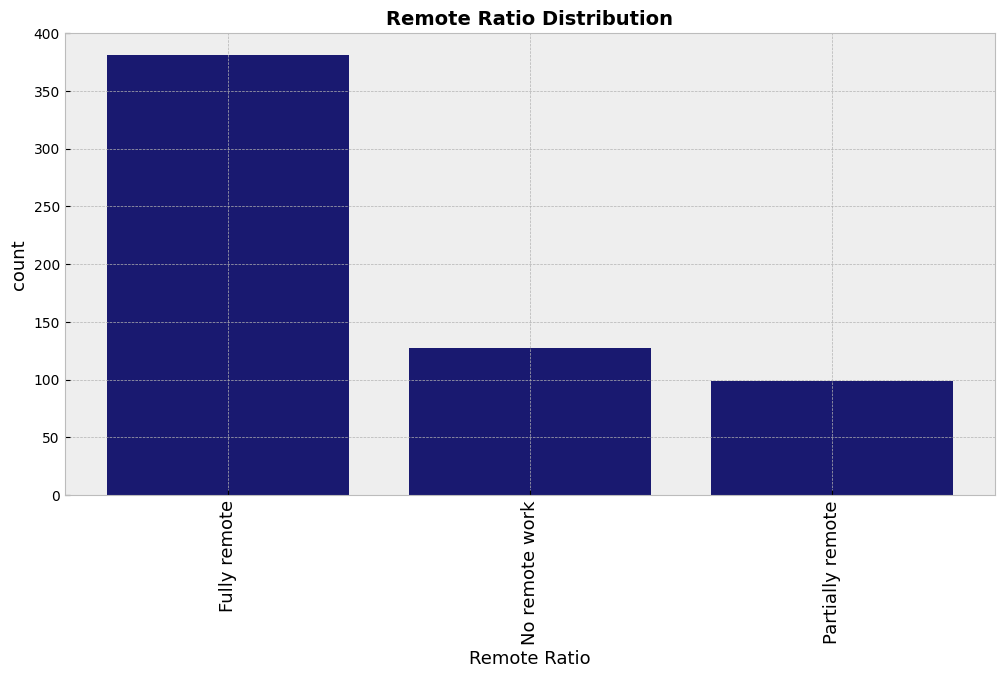

In [23]:
con_type = df['remote_ratio'].value_counts()
con_quan = df['remote_ratio'].value_counts().index.get_level_values(0).tolist()
fig = plt.figure(figsize =(12, 6))
plt.bar(con_quan,con_type,color = "midnightblue")
plt.xticks(rotation = 90, fontsize = 13)
plt.ylabel("count", fontsize =13 )
plt.xlabel("Remote Ratio", fontsize =13)
plt.title("Remote Ratio Distribution",fontsize =14, fontweight = "bold")
plt.show()

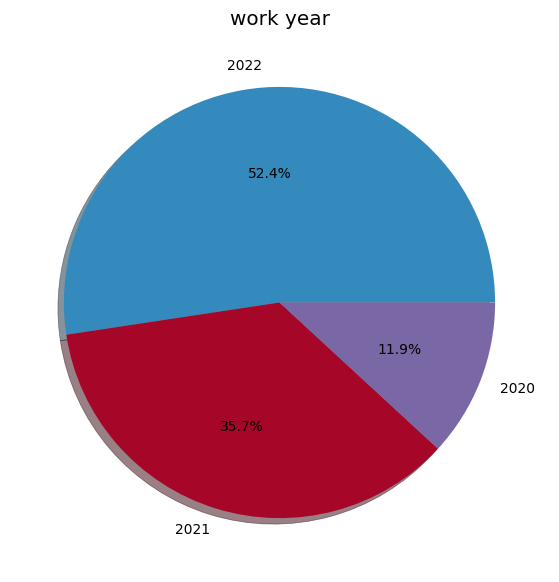

In [24]:
wyear = df['work_year'].value_counts()
wyear_val = df['work_year'].value_counts().index.get_level_values(0).tolist()
my_explode = (0,0, 0)
plt.style.use('bmh')
fig = plt.figure(figsize =(10, 7))
plt.pie(wyear ,labels=wyear_val,autopct='%1.1f%%', shadow = True, explode=my_explode)
plt.title('work year')
plt.show()

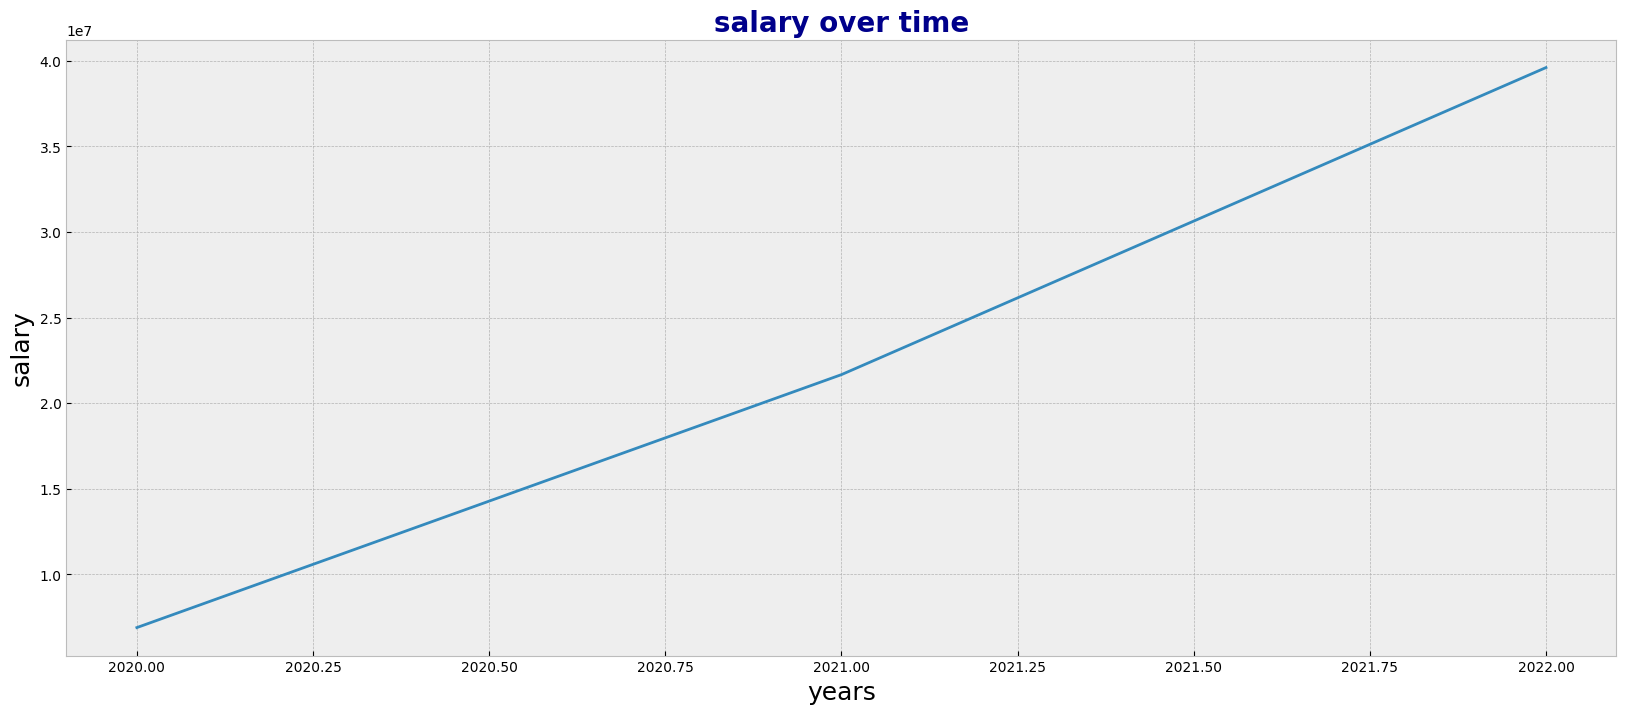

In [25]:
salary_year = df.groupby('work_year')['salary_in_usd'].sum()
plt.figure(figsize = (20,8))
plt.plot(salary_year)
plt.title("salary over time", fontsize = 20, fontweight = "bold", color = "darkblue")
plt.ylabel("salary",fontsize = 18)
plt.xlabel("years",fontsize = 18)
plt.show()

## there is rise of salary in Data Science field but i think this rise because increase number of worker join this field

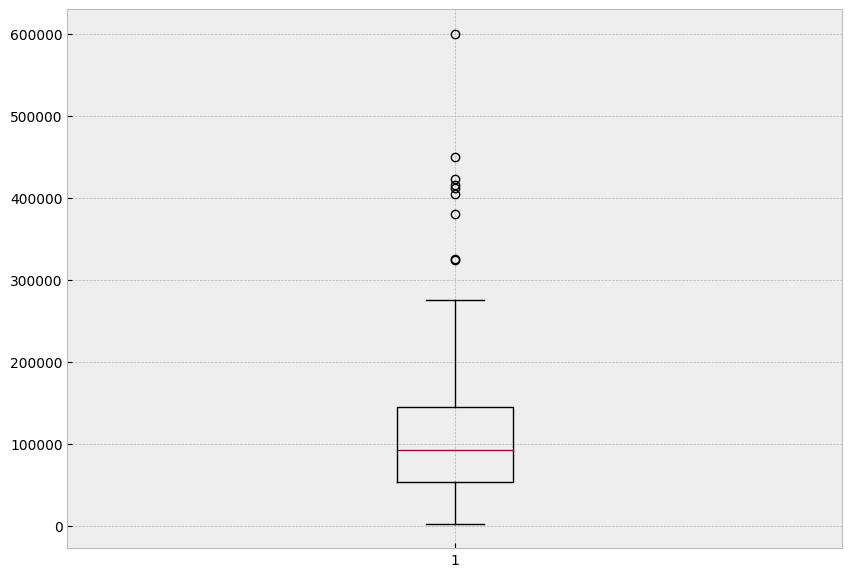

In [26]:
salary = df['salary_in_usd'].value_counts().index.get_level_values(0).tolist()

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(salary)
 
# show plot
plt.show()

In [27]:
mean2020 = df.query('work_year == 2020').salary_in_usd.mean().round(0)
mean2021 = df.query('work_year == 2021').salary_in_usd.mean().round(0)
mean2022 = df.query('work_year == 2022').salary_in_usd.mean().round(0)


years = ["2022","2021","2020"]
years

['2022', '2021', '2020']

In [28]:
meansyears = [mean2022,mean2021,mean2020]
meansyears

[124522.0, 99854.0, 95813.0]

In [29]:
df.groupby(['work_year'],as_index=False).mean()

,work_year,salary_in_usd
0,2020,95813.000000
1,2021,99853.792627
2,2022,124522.006289


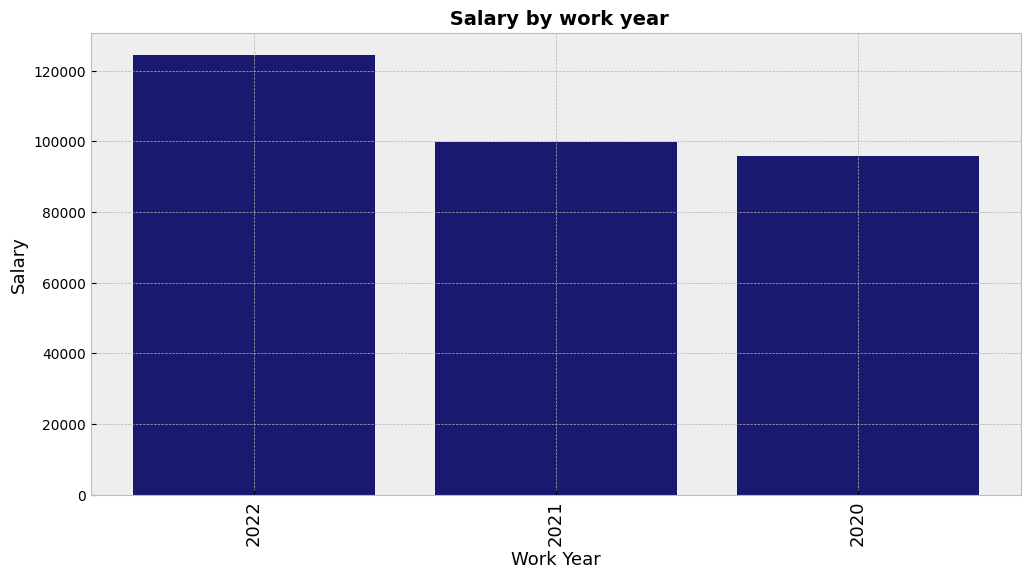

In [30]:
fig = plt.figure(figsize =(12, 6))
plt.bar(years,meansyears,color = "midnightblue")
plt.xticks(rotation = 90, fontsize = 13)
plt.ylabel("Salary", fontsize =13 )
plt.xlabel("Work Year", fontsize =13)
plt.title(" Salary by work year",fontsize =14, fontweight = "bold")
plt.show()

In [31]:
df.groupby(['experience_level'],as_index=False).mean().round(0)

,experience_level,work_year,salary_in_usd
0,Entry-level,2021.0,61643.0
1,Executive-level,2021.0,199392.0
2,Mid-level,2021.0,87996.0
3,Senior-level,2022.0,138617.0


In [32]:
exps = df['experience_level'].value_counts().index.get_level_values(0).tolist()
exps

['Senior-level', 'Mid-level', 'Entry-level', 'Executive-level']

In [33]:
exp_en = df.query('experience_level == "Entry-level"').salary_in_usd.mean().round(0)
exp_ex = df.query('experience_level == "Executive-level"').salary_in_usd.mean().round(0)
exp_ml = df.query('experience_level == "Mid-level"').salary_in_usd.mean().round(0)
exp_sl = df.query('experience_level == "Senior-level"').salary_in_usd.mean().round(0)

exps_salary = [exp_sl,exp_ml,exp_en,exp_ex]
exps_salary

[138617.0, 87996.0, 61643.0, 199392.0]

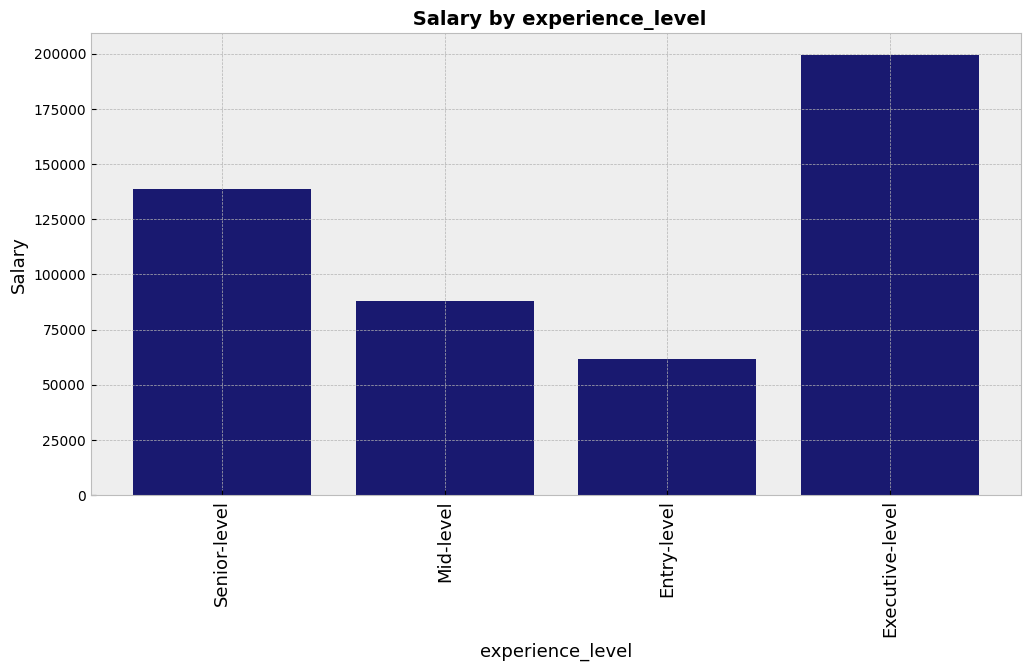

In [34]:
fig = plt.figure(figsize =(12, 6))
plt.bar(exps,exps_salary,color = "midnightblue")
plt.xticks(rotation = 90, fontsize = 13)
plt.ylabel("Salary", fontsize =13 )
plt.xlabel("experience_level", fontsize =13)
plt.title(" Salary by experience_level",fontsize =14, fontweight = "bold")
plt.show()

In [35]:
salary_job = df.groupby(['salary_in_usd','job_title']).size().reset_index()
salary_job = salary_job[-20:]
salary_job

,salary_in_usd,job_title,0
479,242000,Data Engineer,1
480,243900,Data Engineer,1
481,250000,Director of Data Science,1
482,250000,Machine Learning Engineer,1
483,256000,ML Engineer,1
484,260000,Data Scientist,1
485,260000,Machine Learning Scientist,1
486,266400,Data Architect,1
487,270000,ML Engineer,1
488,276000,Lead Data Engineer,1


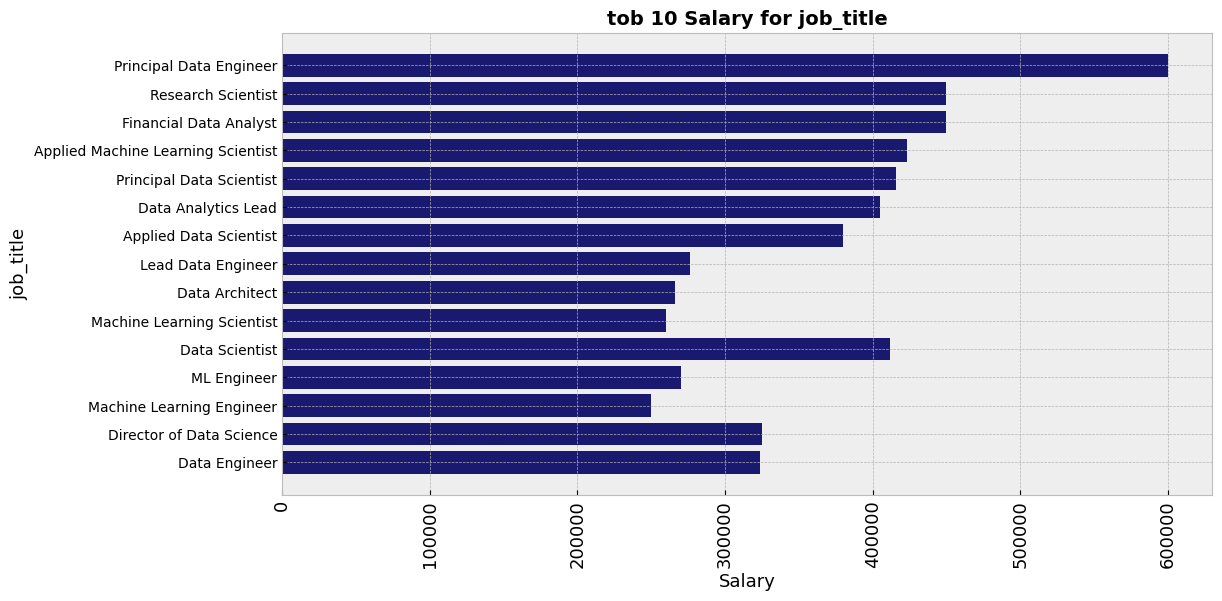

In [36]:
fig = plt.figure(figsize =(12, 6))
plt.barh(salary_job['job_title'],salary_job['salary_in_usd'],color = "midnightblue")
plt.xticks(rotation = 90, fontsize = 13)
plt.ylabel("job_title", fontsize =13 )
plt.xlabel("Salary", fontsize =13)
plt.title("tob 10 Salary for job_title",fontsize =14, fontweight = "bold")
plt.show()